In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap



In [36]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = pd.read_csv(url, names=names)


In [37]:
X = df.iloc[:, 2:]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
y_pred = rfc.predict(X_test)


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9707602339181286


In [41]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)


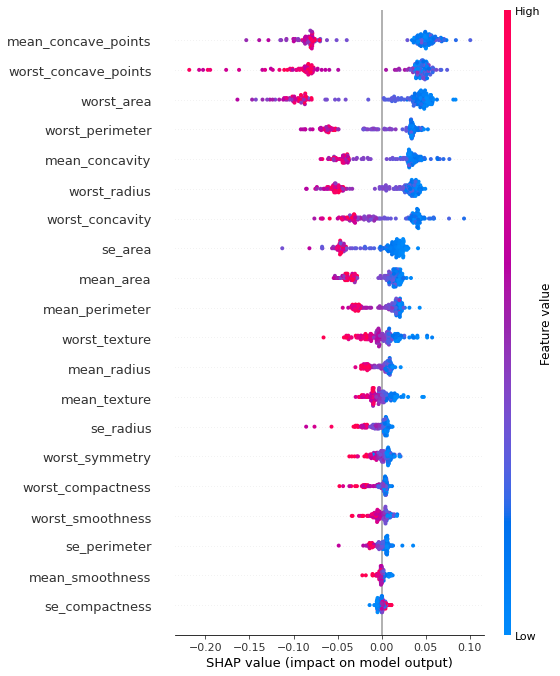

In [42]:
shap.summary_plot(shap_values[0], X_test, plot_type='dot')
